# PART 1: LOAD AND CLEAN DATA

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

Question: who is a target client?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# There was info about this file
# that we need to delete last two columns
columns_list = df.columns.tolist()
columns_list

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [5]:
columns_to_drop = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns=columns_to_drop)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.head()

# drop CLIENTNUM
# Attrition_Flag: Existing Customer OR Attrited Customer --> 1 or 0
# Gender --> 1 or 0
# Education_Level --> check and change to numeric
# Marital_Status --> check and change to numeric
# Income_Category --> check and change to numeric
# Card_Category --> check and change to numeric

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
# drop CLIENTNUM
columns_to_drop = ["CLIENTNUM"]
df = df.drop(columns=columns_to_drop)

In [10]:
# Attrition_Flag: Existing Customer OR Attrited Customer --> 1 or 0
# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['Attrition_Flag']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [11]:
# drop the second columns
columns_to_drop = ["Attrition_Flag_Attrited Customer"]
df = df.drop(columns=columns_to_drop)

In [12]:
# Gender --> 1 or 0

from sklearn.preprocessing import LabelEncoder
variables = ['Gender']
encoder = LabelEncoder()

# apply the LabelEncoder to specific columns in our DataFrame (see variables above)
df[variables] = df[variables].apply(encoder.fit_transform)

In [13]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer
0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [14]:
# Education_Level --> check and change to numeric
unique_values = df['Education_Level'].unique()
unique_values

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [15]:
# pandas get_dummies to change data to numeric
variable = 'Education_Level'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

In [16]:
df.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,45,1,3,Married,$60K - $80K,Blue,39,5,1,3,...,1.625,0.061,1,0,0,0,1,0,0,0
1,49,0,5,Single,Less than $40K,Blue,44,6,1,2,...,3.714,0.105,1,0,0,1,0,0,0,0
2,51,1,3,Married,$80K - $120K,Blue,36,4,1,0,...,2.333,0.000,1,0,0,1,0,0,0,0
3,40,0,4,Unknown,Less than $40K,Blue,34,3,4,1,...,2.333,0.760,1,0,0,0,1,0,0,0
4,40,1,3,Married,$60K - $80K,Blue,21,5,1,0,...,2.500,0.000,1,0,0,0,0,0,1,0


In [17]:
# drop the last column
columns_to_drop = ["Unknown"]
df = df.drop(columns=columns_to_drop)

# the same steps with 
# Marital_Status --> check and change to numeric
# Income_Category --> check and change to numeric
# Card_Category --> check and change to numeric

In [18]:
# Marital_Status --> check and change to numeric
unique_values = df['Marital_Status'].unique()
unique_values

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [19]:
variable = 'Marital_Status'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

In [20]:
# drop the last column
columns_to_drop = ["Unknown"]
df = df.drop(columns=columns_to_drop)

In [21]:
# Income_Category --> check and change to numeric
unique_values = df["Income_Category"].unique()
unique_values

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [22]:
variable = 'Income_Category'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

In [23]:
columns_to_drop = ["Unknown"]
df = df.drop(columns=columns_to_drop)

In [24]:
# Card_Category --> check and change to numeric
unique_values = df['Card_Category'].unique()
unique_values

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [25]:
variable = 'Card_Category'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

In [26]:
# drop the last column
columns_to_drop = ["Platinum"]
df = df.drop(columns=columns_to_drop)

In [27]:
df.head()
# now all data is numeric

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Married,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Silver
0,45,1,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,1,0,0,1,0,0
1,49,0,5,44,6,1,2,8256.0,864,7392.0,...,0,1,0,0,0,0,1,1,0,0
2,51,1,3,36,4,1,0,3418.0,0,3418.0,...,1,0,0,0,0,1,0,1,0,0
3,40,0,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,0,0,1,1,0,0
4,40,1,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,1,0,0,1,0,0


# PART 2: Balance of data

In [28]:
class_counts = df['Attrition_Flag_Existing Customer'].value_counts()
class_counts

1    8500
0    1627
Name: Attrition_Flag_Existing Customer, dtype: int64

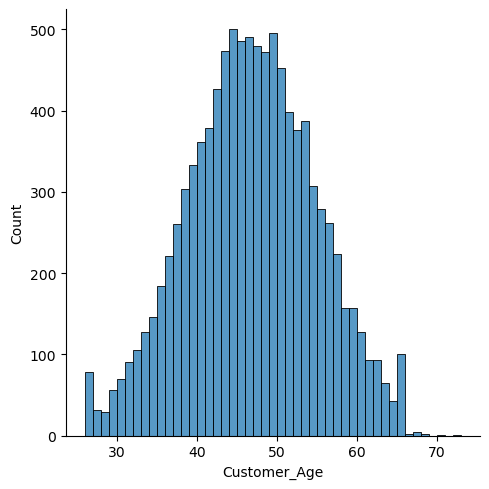

In [29]:
sns.displot(df, x="Customer_Age")

In [30]:
# there is no need to check other columns 
# because we can see that the main columns are more or less balanced
# but we will remove outliers anyway 
# version 1, SciPy, extreme outliers that go under -3 or over +3 in normal distribution
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# PART 3: The train/test –split

In [31]:
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('Attrition_Flag_Existing Customer', axis=1)
y = df['Attrition_Flag_Existing Customer']

In [32]:
# split the data into train/test split
# if you want to get the same KNN-result every time, use a random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# Logistics regression's resutls:
	
#              precision    recall  f1-score   support
#
#           0       0.71      0.55      0.62       301
#           1       0.93      0.96      0.94      1746

#    accuracy                           0.90      2047
#   macro avg       0.82      0.76      0.78      2047
#weighted avg       0.89      0.90      0.90      2047
#Model overall accuracy: 90.13%


# SVC
# Define your pipeline
#model = make_pipeline(StandardScaler(), svm.SVC(probability=True))

# Fit the pipeline to your training data
#model.fit(X_train, y_train)

#              precision    recall  f1-score   support

#           0       0.86      0.65      0.74       275
#           1       0.94      0.98      0.96      1431

#    accuracy                           0.93      1706
#   macro avg       0.90      0.81      0.85      1706
#weighted avg       0.92      0.93      0.92      1706
# Model overall accuracy: 92.56%

Based on iterations, best k-value is this:
8


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=8))])

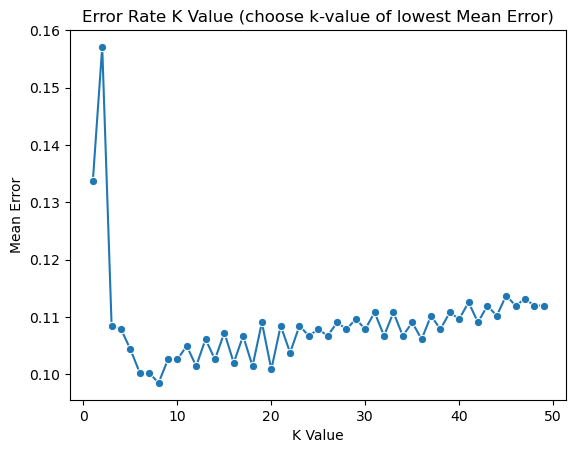

In [34]:
# determine the optimal k-value for this algorithm

# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
# this has to always be less than the amount of rows
# in the training data
max_iterations = 50

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric="minkowski"))
model.fit(X_train, y_train)


# random_state=156 -- Model overall accuracy: 88.39%
# random_state=0 -- Model overall accuracy: 89.04%
# random_state=30 -- Model overall accuracy: 88.22%
# random_state=3 -- Model overall accuracy: 89.68%
# random_state=5 -- Model overall accuracy: 90.15% - the best
# random_state=6 -- Model overall accuracy: 88.92%
# random_state=4 -- Model overall accuracy: 89.80%

# metric_selection = "minkowski" -- Model overall accuracy: 90.15% - I will stay with minkowski
# metric_selection = "euclidean" -- Model overall accuracy: 90.15%
# metric_selection = "manhattan" -- Model overall accuracy: 89.86%
# metric_selection = "chebyshev" -- Model overall accuracy: 89.74%





# Analysis:
# KNN: Model overall accuracy: 90.15%
# SVC: Model overall accuracy: 92.56%
# Log.reg: Model overall accuracy: 90.13%
# the best result with SVC

# KNN
# [[ 124  133]
# [  35 1414]]

# SVC
# [[ 191  117]
# [  28 1370]]

# confusion matrix is also better

# PART 5: Error and performance metrics

In [35]:
# make test predictions with new data with our model
predictions = model.predict(X_test)

In [36]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.78      0.48      0.60       257
           1       0.91      0.98      0.94      1449

    accuracy                           0.90      1706
   macro avg       0.85      0.73      0.77      1706
weighted avg       0.89      0.90      0.89      1706


Model overall accuracy: 90.15%


In [37]:
print(confusion_matrix(y_test, predictions))

# if you want a more graphical version of this, try:
# the fmt-parameter will change to decimal format from scientific format
# sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

# the first row is not good
# but the second row of metrics show better results

[[ 124  133]
 [  35 1414]]


In [38]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y, model.predict_proba(X.values)[:, 1])

# not good resutls but the metric is very sensitive

/Users/emiliiazemskova/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.9332863223755063